# Support Vector Machines

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

In [18]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

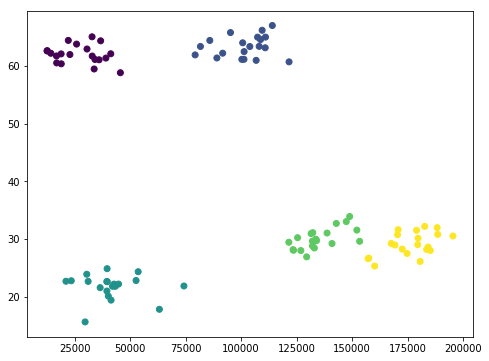

In [19]:
%matplotlib inline
from pylab import *

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

In [26]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

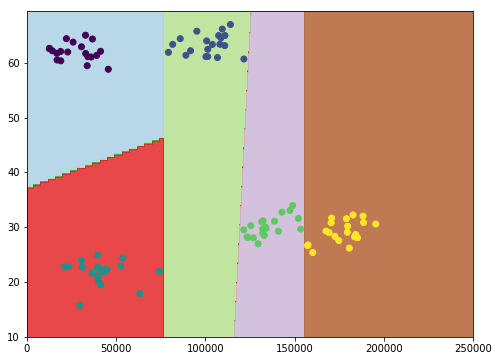

In [27]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

Or just use predict for a given point:

In [28]:
print(svc.predict([[200000, 40]]))

[4]


In [30]:
print(svc.predict([[50000, 95]]))

[0]


## Activity

"Linear" is one of many kernels scikit-learn supports on SVC. Look up the documentation for scikit-learn online to find out what the other possible kernel options are. Do any of them work well for this data set?

In [9]:
(X, y) = createClusteredData(10, 5)


In [10]:
X, y

(array([[  1.83548415e+05,   2.67084498e+01],
        [  1.77953915e+05,   2.41513009e+01],
        [  6.01628242e+04,   6.23298771e+01],
        [  3.37295882e+04,   5.99011357e+01],
        [  1.59098558e+05,   6.05419562e+01],
        [  1.38775780e+05,   5.97362767e+01],
        [  1.69838598e+05,   4.31853877e+01],
        [  1.81067613e+05,   4.59698803e+01],
        [  2.09208911e+05,   4.21894572e+01],
        [  2.01773624e+05,   3.96563482e+01]]),
 array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4]))

In [13]:
l1 = [1,2,3,4,5,6,7,8]
l1[:,0]

TypeError: list indices must be integers or slices, not tuple